In [2]:
import pandas as pd
import seaborn as sns

from findlay2025a import core

In [4]:
nb = core.get_project("seahorse")
frac = pd.read_parquet(nb.get_project_file("sleep_period_fractional_occupancy.pqt"))
ecdf = pd.read_parquet(nb.get_project_file("sleep_period_bout_duration_ecdfs.pqt"))

In [7]:
order = ["NREM", "IS", "REM", "Wake", "MA"]

m_exp = ["o", "^", "P"]
p_exp = sns.color_palette("Dark2_r", 8)[0:2]

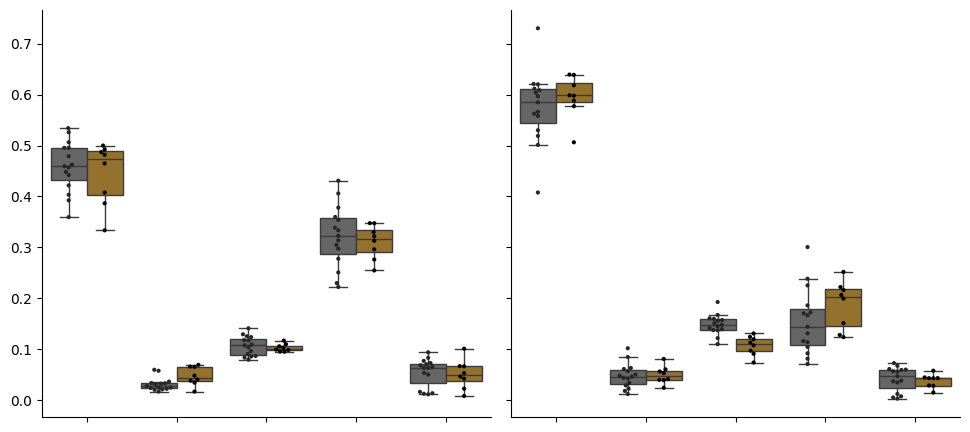

In [ ]:
g = sns.catplot(
    data=frac[frac["experiment"].isin(["Novelty", "Locomotion"])],
    x="state",
    order=order,
    y="fractional_occupancy",
    hue="experiment",
    palette=p_exp,
    col="day",
    kind="box",
    showfliers=False,
    legend=False,
)
g.map_dataframe(
    sns.swarmplot,
    x="state",
    y="fractional_occupancy",
    hue="experiment",
    palette="dark:k",
    dodge=True,
    s=3,
)

g.set(xlabel=None, ylabel=None, xticklabels=[], title=None)
# g.savefig(nb.get_project_file("figures/fractional_occupancy_col=day.png"), dpi=600)

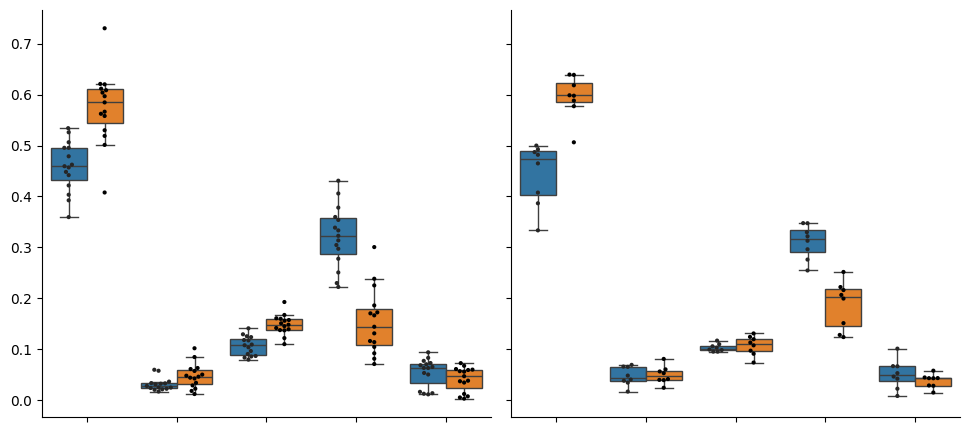

In [11]:
g = sns.catplot(
    data=frac[frac["experiment"].isin(["Novelty", "Locomotion"])],
    x="state",
    y="fractional_occupancy",
    hue="day",
    col="experiment",
    order=order,
    kind="box",
    showfliers=False,
    legend=False,
)
g.map_dataframe(
    sns.swarmplot,
    x="state",
    y="fractional_occupancy",
    hue="day",
    palette="dark:k",
    dodge=True,
    s=3,
)

g.set(xlabel=None, ylabel=None, xticklabels=[], title=None)
# g.savefig(nb.get_project_file("figures/fractional_occupancy_col=exp.png"), dpi=600)

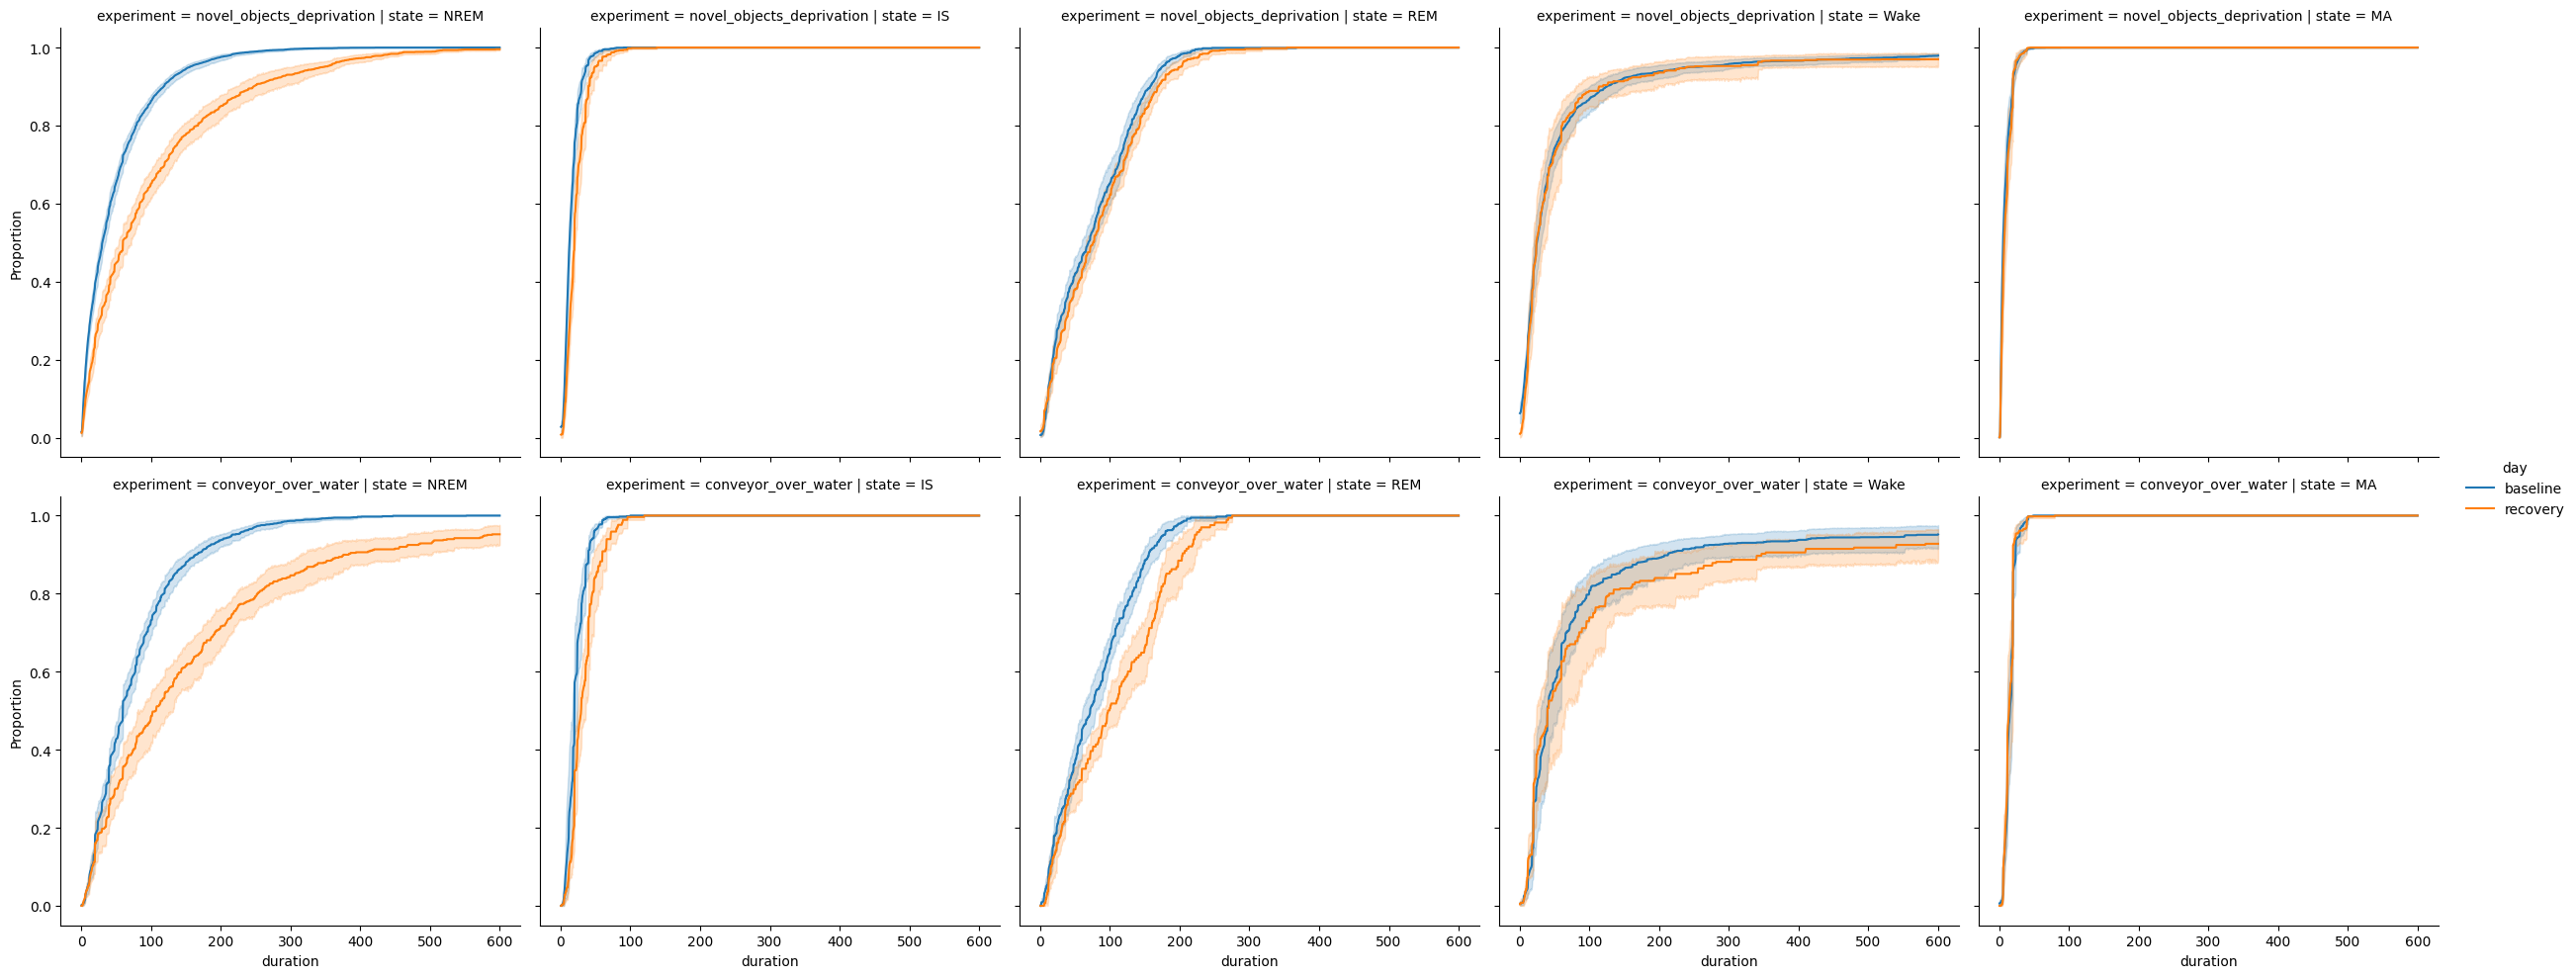

In [10]:
g = sns.relplot(
    data=ecdf[ecdf["experiment"].isin(["Novelty", "Locomotion"])],
    x="duration",
    y="Proportion",
    row="experiment",
    col="state",
    col_order=order,
    hue="day",
    kind="line",
)